In [1]:
# Importing dependencies 
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import numpy as np

/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Use

In [2]:
# load in the zoo animal dataset
zoo_animals = pd.read_csv("data/zoo_animals.csv")
zoo_animals.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo_animals = zoo_animals.drop(columns=['animal name'])

In [4]:
zoo_animals.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

In [5]:
X = zoo_animals.iloc[:,:-1]
Y = zoo_animals.iloc[:,-1]

In [6]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
y = pd.DataFrame(Y)

In [8]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [9]:
print(X.shape)
print(y.shape)

(101, 16)
(101, 1)


In [10]:
# Split data into train and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# scaling our data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [12]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
 # One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 

In [15]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [16]:
from tensorflow.keras.layers import Dense
number_inputs = 16
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,activation='relu', input_dim=number_inputs))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.add(Dense(units=8, activation='softmax'))

In [18]:
# model summary
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 68        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
 # Fit (train) the model
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
75/75 - 0s - loss: 2.1686 - acc: 0.3200
Epoch 2/500
75/75 - 0s - loss: 2.1493 - acc: 0.3200
Epoch 3/500
75/75 - 0s - loss: 2.1293 - acc: 0.3333
Epoch 4/500
75/75 - 0s - loss: 2.1117 - acc: 0.3333
Epoch 5/500
75/75 - 0s - loss: 2.0924 - acc: 0.3333
Epoch 6/500
75/75 - 0s - loss: 2.0742 - acc: 0.3333
Epoch 7/500
75/75 - 0s - loss: 2.0562 - acc: 0.3333
Epoch 8/500
75/75 - 0s - loss: 2.0386 - acc: 0.3467
Epoch 9/500
75/75 - 0s - loss: 2.0218 - acc: 0.3467
Epoch 10/500
75/75 - 0s - loss: 2.0044 - acc: 0.3467
Epoch 11/500
75/75 - 0s - loss: 1.9878 - acc: 0.3467
Epoch 12/500
75/75 - 0s - loss: 1.9703 - acc: 0.3467
Epoch 13/500
75/75 - 0s - loss: 1.9540 - acc: 0.3467
Epoch 14/500
75/75 - 0s - loss: 1.9374 - acc: 0.3467
Epoch 15/500
75/75 - 0s - loss: 1.9205 - acc: 0.3467
Epoch 16/500
75/75 - 0s - loss: 1.9035 - acc: 0.3467
Epoch 17/500
75/75 - 0s - loss: 1.8869 - acc: 0.3467
Epoch 18/500
75/75 - 0s - loss: 1.8703 - acc: 0.3600
Epoch 19/500
75/75 - 0s - loss: 1.8539 - acc: 0.3600
Ep

Epoch 155/500
75/75 - 0s - loss: 0.7639 - acc: 0.7333
Epoch 156/500
75/75 - 0s - loss: 0.7588 - acc: 0.7333
Epoch 157/500
75/75 - 0s - loss: 0.7539 - acc: 0.7333
Epoch 158/500
75/75 - 0s - loss: 0.7492 - acc: 0.7333
Epoch 159/500
75/75 - 0s - loss: 0.7444 - acc: 0.7333
Epoch 160/500
75/75 - 0s - loss: 0.7400 - acc: 0.7333
Epoch 161/500
75/75 - 0s - loss: 0.7349 - acc: 0.7333
Epoch 162/500
75/75 - 0s - loss: 0.7304 - acc: 0.7333
Epoch 163/500
75/75 - 0s - loss: 0.7259 - acc: 0.7333
Epoch 164/500
75/75 - 0s - loss: 0.7215 - acc: 0.7333
Epoch 165/500
75/75 - 0s - loss: 0.7170 - acc: 0.7333
Epoch 166/500
75/75 - 0s - loss: 0.7129 - acc: 0.7333
Epoch 167/500
75/75 - 0s - loss: 0.7087 - acc: 0.7333
Epoch 168/500
75/75 - 0s - loss: 0.7046 - acc: 0.7333
Epoch 169/500
75/75 - 0s - loss: 0.7007 - acc: 0.7333
Epoch 170/500
75/75 - 0s - loss: 0.6968 - acc: 0.7333
Epoch 171/500
75/75 - 0s - loss: 0.6931 - acc: 0.7333
Epoch 172/500
75/75 - 0s - loss: 0.6892 - acc: 0.7333
Epoch 173/500
75/75 - 0s - l

Epoch 307/500
75/75 - 0s - loss: 0.4477 - acc: 0.7867
Epoch 308/500
75/75 - 0s - loss: 0.4466 - acc: 0.8000
Epoch 309/500
75/75 - 0s - loss: 0.4452 - acc: 0.8000
Epoch 310/500
75/75 - 0s - loss: 0.4441 - acc: 0.8000
Epoch 311/500
75/75 - 0s - loss: 0.4428 - acc: 0.8000
Epoch 312/500
75/75 - 0s - loss: 0.4416 - acc: 0.8000
Epoch 313/500
75/75 - 0s - loss: 0.4404 - acc: 0.8000
Epoch 314/500
75/75 - 0s - loss: 0.4392 - acc: 0.8000
Epoch 315/500
75/75 - 0s - loss: 0.4379 - acc: 0.8000
Epoch 316/500
75/75 - 0s - loss: 0.4368 - acc: 0.8000
Epoch 317/500
75/75 - 0s - loss: 0.4356 - acc: 0.8000
Epoch 318/500
75/75 - 0s - loss: 0.4343 - acc: 0.8000
Epoch 319/500
75/75 - 0s - loss: 0.4331 - acc: 0.8000
Epoch 320/500
75/75 - 0s - loss: 0.4319 - acc: 0.8000
Epoch 321/500
75/75 - 0s - loss: 0.4308 - acc: 0.8000
Epoch 322/500
75/75 - 0s - loss: 0.4295 - acc: 0.8000
Epoch 323/500
75/75 - 0s - loss: 0.4282 - acc: 0.8000
Epoch 324/500
75/75 - 0s - loss: 0.4268 - acc: 0.8000
Epoch 325/500
75/75 - 0s - l

Epoch 459/500
75/75 - 0s - loss: 0.2693 - acc: 0.9867
Epoch 460/500
75/75 - 0s - loss: 0.2683 - acc: 0.9867
Epoch 461/500
75/75 - 0s - loss: 0.2675 - acc: 0.9867
Epoch 462/500
75/75 - 0s - loss: 0.2666 - acc: 0.9867
Epoch 463/500
75/75 - 0s - loss: 0.2657 - acc: 0.9867
Epoch 464/500
75/75 - 0s - loss: 0.2649 - acc: 0.9867
Epoch 465/500
75/75 - 0s - loss: 0.2641 - acc: 0.9867
Epoch 466/500
75/75 - 0s - loss: 0.2632 - acc: 0.9867
Epoch 467/500
75/75 - 0s - loss: 0.2625 - acc: 0.9867
Epoch 468/500
75/75 - 0s - loss: 0.2616 - acc: 0.9867
Epoch 469/500
75/75 - 0s - loss: 0.2608 - acc: 0.9867
Epoch 470/500
75/75 - 0s - loss: 0.2600 - acc: 0.9867
Epoch 471/500
75/75 - 0s - loss: 0.2592 - acc: 0.9867
Epoch 472/500
75/75 - 0s - loss: 0.2584 - acc: 0.9867
Epoch 473/500
75/75 - 0s - loss: 0.2576 - acc: 0.9867
Epoch 474/500
75/75 - 0s - loss: 0.2570 - acc: 0.9867
Epoch 475/500
75/75 - 0s - loss: 0.2562 - acc: 0.9867
Epoch 476/500
75/75 - 0s - loss: 0.2554 - acc: 0.9867
Epoch 477/500
75/75 - 0s - l

In [21]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 0s - loss: 0.3417 - acc: 0.9231
Loss: 0.3416769206523895, Accuracy: 0.9230769276618958


In [22]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [23]:
import matplotlib.pyplot as plt

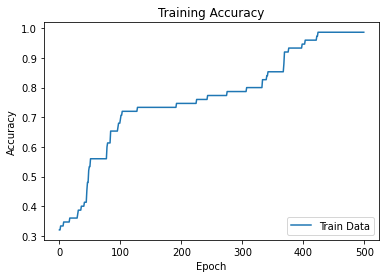

In [24]:
#creating a plot to display accurancy over each epoch
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data'], loc='lower right')
plt.show()